In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

In [2]:
#datos
iris = datasets.load_iris()

#Dividimos los datos entre entrenamiento y prueba, el parametro n_folds: # de partes que dividiremos 
#los datos, usamos 80% entrenamiento , por eso dividimos en 5 partes los datos, 4 partes las usuaremos 
#para entrenamiento 

skf = StratifiedKFold(n_splits=5)

#Extraemos los datos de entrenamiento y las etiquetas

train_index, test_index = next(iter(skf.split(iris.data, iris.target)))

#datos entrenamiento y etiquetas
X_train = iris.data[train_index]
y_train = iris.target[train_index]

#datos de prueba y etiquetas
X_test = iris.data[test_index]
y_test = iris.target[test_index]

num_classes = len(np.unique(y_train))

### Construimos el modelo de mezcla gaussiano

* n_components: Especifica el numero de componentes en la distribución subyacente. En este caso define el numero de clases distintas en los datos.
* covariance_type: especifica el numero de covarianza a usar, usamos la completa (full) es decir cada componente tiene su pripia matrix de covarianza.
* init_params: controla el parametro que debe actualizarse durante el proceso de capacitación, usamos 'kmeans' que significa que los parametros 'peso' y 'covarianza' se actulizan en el entrenamiento. 
* n_iter: Se refiere al número de iteraciones  durante el entrenamiento.

In [5]:
classifier = GaussianMixture(n_components=num_classes, covariance_type='full', init_params='kmeans' , max_iter=21)

classifier.means_ = np.array([X_train[y_train == 1].mean(axis=0) for i in range(num_classes)])

classifier.fit(X_train)

/home/andres/.local/lib/python3.8/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


GaussianMixture(max_iter=21, n_components=3)

Visualizamos los limites del clasificador, esto lo hacemos extrayendo los valores propios y vectores propios para estimar como dibujar los limites elípticos de los grupos.

<ipython-input-6-deca0bc838b8>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axis_handle = plt.subplot(1, 1, 1)


Accuracy on training data = 37.5
Accuracy on testing data = 33.33333333333333


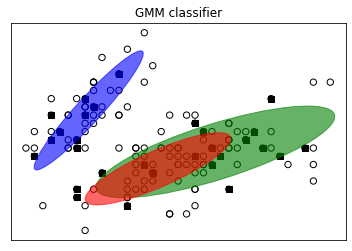

In [6]:
#Dibujar limites
plt.figure()

colors = 'bgr'

for i, color in enumerate(colors):
    #Extraemos los valores propios y los vectores propios
    eigenvalues, eigenvectors = np.linalg.eigh(classifier.covariances_[i][:2,:2])
    #Normalizamos el primer vector propio
    norm_vec = eigenvectors[0] / np.linalg.norm(eigenvectors[0])
    
    # Extraemos el angulo de inclinación 
    angle = np.arctan2(norm_vec[1], norm_vec[0])
    angle = 180 * angle / np.pi
    
    # Factor de escala para ampliar las elipses
    # (random value chosen to suit our needs)
    scaling_factor = 8
    eigenvalues *= scaling_factor
    
    
    # Draw the ellipse
    ellipse = patches.Ellipse(classifier.means_[i, :2],
    eigenvalues[0], eigenvalues[1], 180 + angle,
    color=color)
    axis_handle = plt.subplot(1, 1, 1)
    ellipse.set_clip_box(axis_handle.bbox)
    ellipse.set_alpha(0.6)
    axis_handle.add_artist(ellipse)

  
# Plot the data
colors = 'bgr'
for i, color in enumerate(colors):
    cur_data = iris.data[iris.target == i]
    plt.scatter(cur_data[:,0], cur_data[:,1], marker='o',
    facecolors='none', edgecolors='black', s=40,
    label=iris.target_names[i])
    test_data = X_test[y_test == i]
    plt.scatter(test_data[:,0], test_data[:,1], marker='s',facecolors='black', edgecolors='black', s=40,
                label=iris.target_names[i])
    
# Compute predictions for training and testing data
y_train_pred = classifier.predict(X_train)
accuracy_training = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print('Accuracy on training data =', accuracy_training)
y_test_pred = classifier.predict(X_test)
accuracy_testing = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
print('Accuracy on testing data =', accuracy_testing)
plt.title('GMM classifier')
plt.xticks(())
plt.yticks(())
plt.show()